In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [22]:
rating = pd.read_csv('rating.csv')
anime = pd.read_csv('anime.csv')

In [23]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [24]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [25]:
rating = rating.drop('rating',axis=1)
df = pd.merge(rating,anime,on='anime_id')
df.head()

,user_id,anime_id,name,genre,type,episodes,rating,members
0,1,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


### Checking by Mean Value of Rating

In [26]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)


name
Mogura no Motoro                                             9.50
Kimi no Na wa.                                               9.37
Fullmetal Alchemist: Brotherhood                             9.26
Gintama°                                                     9.25
Yakusoku: Africa Mizu to Midori                              9.25
Steins;Gate                                                  9.17
Gintama&#039;                                                9.16
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou    9.15
Hunter x Hunter (2011)                                       9.13
Gintama&#039;: Enchousen                                     9.11
Name: rating, dtype: float64

### seems something's not right here,maybe that animes with more than 9 rating only got a few users watched them so the rating goes up so high.
Some are okay but there are many anmes here which are not that much popular


### Trying to get insght using count of ratings

In [27]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head(10)


name
Death Note                          39340
Sword Art Online                    30583
Shingeki no Kyojin                  29584
Code Geass: Hangyaku no Lelouch     27718
Elfen Lied                          27506
Angel Beats!                        27183
Naruto                              25925
Fullmetal Alchemist                 25032
Fullmetal Alchemist: Brotherhood    24574
Toradora!                           24283
Name: rating, dtype: int64

### Now we can see all the famous one's yipeeeeee

In [28]:
# All anime with their rating and number of users rated

ratings = pd.DataFrame(df.groupby('name')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())

genre_dict = pd.DataFrame(data=anime[['name','genre']])
genre_dict.set_index('name',inplace=True)
ratings.head()

,rating,num of ratings
name,,
&quot;0&quot;,5.06,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",5.00,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.06,782
&quot;Bungaku Shoujo&quot; Memoire,7.54,809
&quot;Bungaku Shoujo&quot; Movie,7.63,1535


(0, 3500)

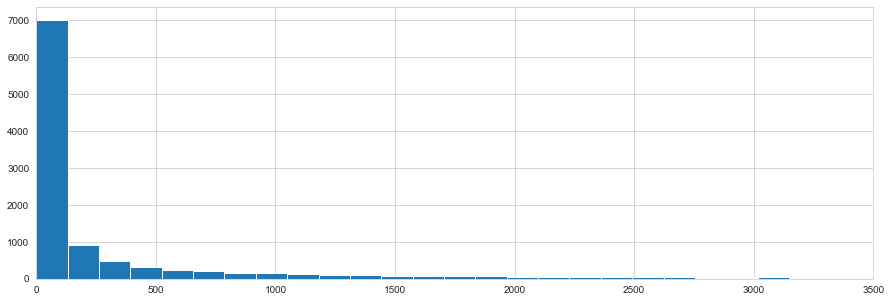

In [29]:
#Now let's check anime number of ratings distribution

plt.figure(figsize=(15,5))
ratings['num of ratings'].hist(bins=300)
plt.xlim(0,3500)


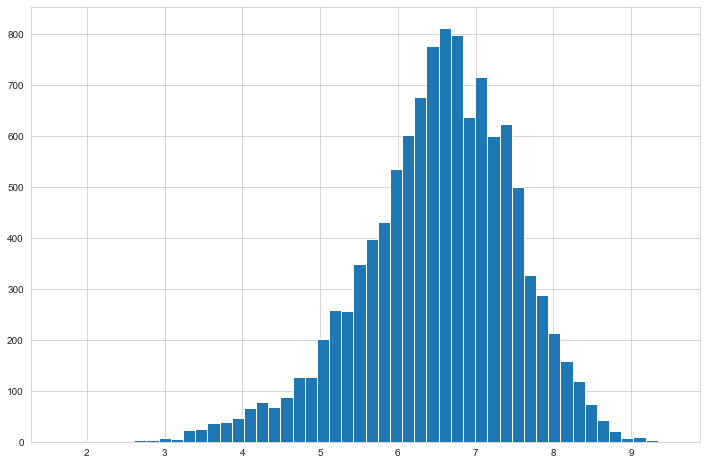

In [30]:
plt.figure(figsize=(12,8))
ratings['rating'].hist(bins=50)
plt.show()

<Figure size 864x576 with 0 Axes>

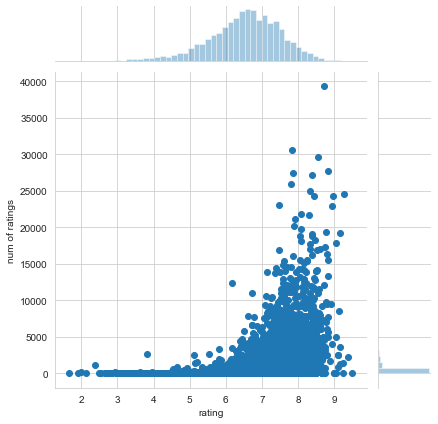

In [31]:
plt.figure(figsize=(12,8))
sns.jointplot(x='rating',y='num of ratings',data=ratings)
plt.show()

### From above scatterplot, we can see the higher number of users give rating, higher chance of the anime gets high rating too.

In [32]:
anime_genre = genre_dict.loc['Naruto'].values[0].split(', ')
anime_genre

['Action', 'Comedy', 'Martial Arts', 'Shounen', 'Super Power']

In [33]:
def check_genre(genre_list,string):
    if any(x in string for x in genre_list):
        return True
    else:
        return False

cols = anime[anime['genre'].apply(lambda x: check_genre(anime_genre,str(x)))]['name'].tolist()
cols

['Fullmetal Alchemist: Brotherhood',
 'Gintama°',
 'Gintama&#039;',
 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
 'Hunter x Hunter (2011)',
 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
 'Gintama&#039;: Enchousen',
 'Koe no Katachi',
 'Gintama',
 'Code Geass: Hangyaku no Lelouch R2',
 'Haikyuu!! Second Season',
 'Shigatsu wa Kimi no Uso',
 'Code Geass: Hangyaku no Lelouch',
 'Hajime no Ippo',
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen',
 'Cowboy Bebop',
 'One Punch Man',
 'Mononoke Hime',
 'Suzumiya Haruhi no Shoushitsu',
 'Monogatari Series: Second Season',
 'Tengen Toppa Gurren Lagann',
 'Great Teacher Onizuka',
 'Hajime no Ippo: New Challenger',
 'Fate/Zero 2nd Season',
 'Kizumonogatari II: Nekketsu-hen',
 'Bakuman. 3rd Season',
 'Gintama°: Aizome Kaori-hen',
 'Ansatsu Kyoushitsu (TV) 2nd Season',
 'Haikyuu!!',
 'Hajime no Ippo: Rising',
 'Kara no Kyoukai 5: Mujun Rasen',
 'Aria The Origination',
 'Kamisama Hajimemashita: Kako-hen',
 'Tengen T

In [34]:
#create matrix based on generated list
anime_mat = df[df['name'].isin(cols)].pivot_table(index='user_id',columns='name',values='rating')
anime_mat

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Eiji&quot;,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Quantum,.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!,.hack//Tasogare no Udewa Densetsu,.hack//Tasogare no Udewa Densetsu: Offline de Aimashou,.hack//The Movie: Sekai no Mukou ni,...,gdgd Fairies 2 Episode 0,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,himitsukesshatakanotsume.jp,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#create correlation table
anime_user_rating = anime_mat['Naruto']
similiar_anime = anime_mat.corrwith(anime_user_rating)
corr_anime = pd.DataFrame(similiar_anime,columns=['correlation'])
corr_anime = corr_anime.join(ratings['num of ratings'])
corr_anime.dropna(inplace=True)
corr_anime = corr_anime[corr_anime['num of ratings']>5000].sort_values( 'correlation',ascending=False)

C:\Users\soura\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\soura\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [22]:
corr_anime.head(10)

,correlation,num of ratings
name,,
Kami nomi zo Shiru Sekai,1.0,11791
MM!,1.0,5947
Kämpfer,1.0,6595
Kuroshitsuji,1.0,15583
Kiss x Sis (TV),1.0,9357
Kiseijuu: Sei no Kakuritsu,1.0,11564
Kill la Kill,1.0,13850
Kara no Kyoukai 1: Fukan Fuukei,1.0,7092
Kaichou wa Maid-sama!,1.0,15391


### seems to be working nicely.
# So now let's build a function for getting anime recommendation

In [15]:
def check_genre(genre_list,string):
    if any(x in string for x in genre_list):
        return True
    else:
        return False
    
def get_recommendation(name):
    anime_genre = genre_dict.loc[name].values[0].split(', ')
    cols = anime[anime['genre'].apply(lambda x: check_genre(anime_genre,str(x)))]['name'].tolist()
    
    animemat = df[df['name'].isin(cols)].pivot_table(
        index='user_id',columns='name',values='rating')
       
    anime_user_rating = animemat[name]
    similiar_anime = animemat.corrwith(anime_user_rating)
    corr_anime = pd.DataFrame(similiar_anime,columns=['correlation'])
    corr_anime = corr_anime.join(ratings['num of ratings'])
    corr_anime.dropna(inplace=True)
    corr_anime = corr_anime[corr_anime['num of ratings']>5000].sort_values('correlation',ascending=False)
    
    return corr_anime.head(10)

In [16]:
get_recommendation('Death Note')

C:\Users\soura\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\soura\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Steins;Gate: Oukoubakko no Poriomania,1.0,7455
Shakugan no Shana II (Second),1.0,8644
Dance in the Vampire Bund,1.0,5174
Nisemonogatari,1.0,10047
Darker than Black: Ryuusei no Gemini,1.0,9841
Kiseijuu: Sei no Kakuritsu,1.0,11564
Sora no Otoshimono,1.0,8765
Kara no Kyoukai 5: Mujun Rasen,1.0,5002
Elfen Lied Special,1.0,7366


In [38]:
print("List of Anime in Database for which you can get recommendation")
set(df['name'])

List of Anime in Database for which you can get recommendation


{'Fullmetal Alchemist: Brotherhood - 4-Koma Theater',
 'Time Bokan Oudou Fukko',
 'Obake no Q-tarou (1985)',
 'Toaru Majutsu no Index-tan II',
 'Ai Yori Aoshi: Yumegatari',
 'Ikkitousen: Extravaganza Epoch',
 'Donguri to Yamaneko',
 'Juusenki L-Gaim II: Farewell My Lovely + Pentagona Doors',
 'Lingeries',
 'Rumiko Takahashi Anthology',
 'Abenobashi Mahou☆Shoutengai',
 'Youkai Watch Movie 1: Tanjou no Himitsu da Nyan!',
 'Blood-C: Special Edition',
 'Gintama&#039;',
 'Parasite Dolls',
 'Ranma ½: 1994 Music Calendar',
 'Pretty Rhythm: Aurora Dream - Prism Shougekijou',
 'Shoujo-tachi wa Kouya wo Mezasu',
 'Rockman.EXE Beast',
 'Koukou Tekken-den Tough',
 'Fushigi na Koala Blinky',
 'Gakkyuu Ou Yamazaki',
 'Handle With Care..',
 'Hyakujitsu no Bara: Jinginaki Nikukyuu-hen',
 'Mobile Suit Gakuen: G-Reco Koushien',
 'Akaneiro ni Somaru Saka',
 'Yume no Tsuzuki',
 'Kodai Ouja Kyouryuu King: Yokuryuu Densetsu',
 'Ayatsuri Ningyou',
 'Highschool of the Dead',
 'Lightning Trap: Leina &amp; Laik

In [19]:
get_recommendation('Haikyuu!! Second Season')

C:\Users\soura\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\soura\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Neon Genesis Evangelion: The End of Evangelion,1.0,10273
Kämpfer,1.0,6595
JoJo no Kimyou na Bouken (TV),1.0,5002
Cowboy Bebop: Tengoku no Tobira,1.0,6927
Naruto: Shippuuden Movie 2 - Kizuna,1.0,6009
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!,1.0,7846
NHK ni Youkoso!,1.0,10023
Motto To LOVE-Ru,1.0,5762
Mayo Chiki!,1.0,7879
